Epoch 1/7
938/938 [==============================] - 65s 68ms/step - loss: 0.1449 - accuracy: 0.9547 - val_loss: 0.0483 - val_accuracy: 0.9834
Epoch 2/7
938/938 [==============================] - 64s 68ms/step - loss: 0.0441 - accuracy: 0.9867 - val_loss: 0.0316 - val_accuracy: 0.9889
Epoch 3/7
938/938 [==============================] - 64s 68ms/step - loss: 0.0283 - accuracy: 0.9913 - val_loss: 0.0298 - val_accuracy: 0.9899
Epoch 4/7
938/938 [==============================] - 64s 68ms/step - loss: 0.0202 - accuracy: 0.9937 - val_loss: 0.0293 - val_accuracy: 0.9902
Epoch 5/7
938/938 [==============================] - 64s 68ms/step - loss: 0.0143 - accuracy: 0.9956 - val_loss: 0.0312 - val_accuracy: 0.9908
Epoch 6/7
938/938 [==============================] - 64s 69ms/step - loss: 0.0102 - accuracy: 0.9965 - val_loss: 0.0300 - val_accuracy: 0.9916
Epoch 7/7
313/313 [==============================] - 4s 12ms/step - loss: 0.0388 - accuracy: 0.9899
Test accuracy: 0.9898999929428101


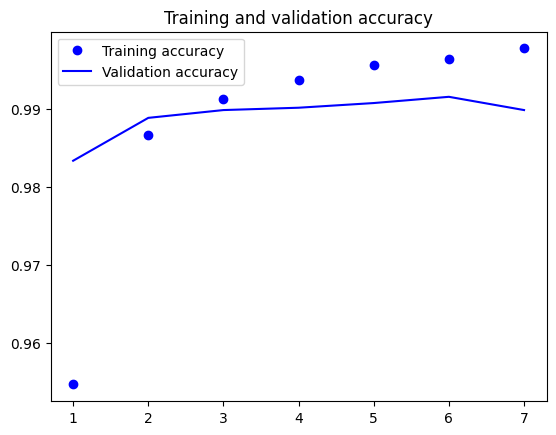

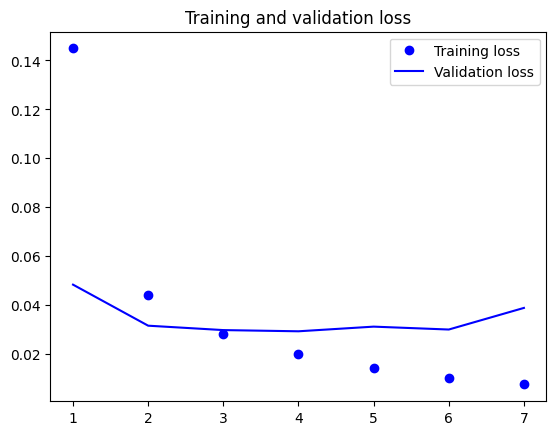

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=7, batch_size=64, validation_data=(X_test, y_test))

test_loss, test_acc = model.evaluate(X_test, y_test)

print('Test accuracy:', test_acc)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

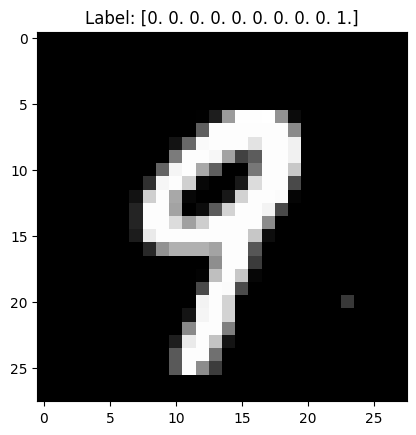

In [ ]:
index = np.random.randint(0, X_train.shape[0])
img = X_train[index]

# Plot the image
plt.imshow(img, cmap='gray')
plt.title('Label: {}'.format(y_train[index]))
plt.show()

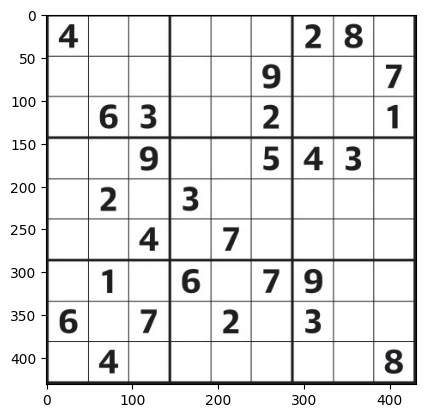

In [ ]:
import cv2
input_img = cv2.imread('input.jpg')
cv2.imwrite('sudoku.jpg', input_img)
sudoku_a = cv2.imread('sudoku.jpg')
plt.figure()
plt.imshow(sudoku_a)
plt.show()

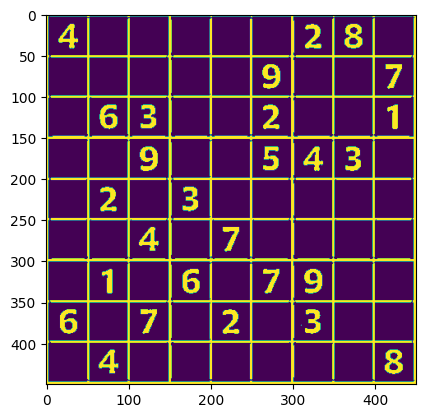

In [ ]:
sudoku_a = cv2.resize(sudoku_a, (450,450))

def preprocess(image):
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  blur = cv2.GaussianBlur(gray, (3,3), 6)
  threshold_img = cv2.adaptiveThreshold(blur, 255, 1, 1, 11, 2)
  return threshold_img

threshold = preprocess(sudoku_a)
plt.figure()
plt.imshow(threshold)
plt.show()

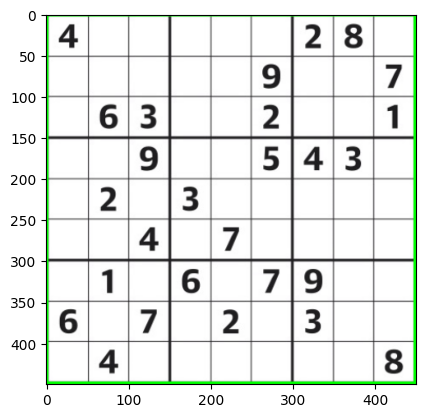

In [ ]:
contour_1 = sudoku_a.copy()
contour_2 = sudoku_a.copy()
contour, hierarchy = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #to find the biggest contour
cv2.drawContours(contour_1, contour, -1, (0,255,0), 3) #drawing the biggest contour
plt.figure()
plt.imshow(contour_1)
plt.show()

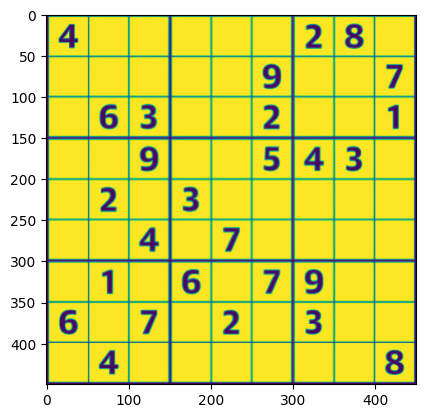

In [ ]:
def main_outline(contour):
  biggest = np.array([])
  max_area = 0
  for i in contour:
    area = cv2.contourArea(i)
    if area > 50:
      peri = cv2.arcLength(i, True)
      approx = cv2.approxPolyDP(i, 0.02*peri, True)
      if area > max_area and len(approx) == 4:
        biggest = approx
        max_area = area
  return biggest, max_area

def reframe(points):
  points = points.reshape((4, 2))
  points_new = np.zeros((4, 1, 2), dtype = np.int32)
  add = points.sum(1)
  points_new[0] = points[np.argmin(add)]
  points_new[3] = points[np.argmax(add)]
  diff = np.diff(points, axis = 1)
  points_new[1] = points[np.argmin(diff)]
  points_new[2] = points[np.argmax(diff)]
  return points_new

black_img = np.zeros((450, 450, 3), np.uint8)
biggest, maxArea = main_outline(contour)
if biggest.size != 0:
  biggest = reframe(biggest)
  cv2.drawContours(contour_2, biggest, -1, (0, 255, 0), 10)
  pts1 = np.float32(biggest)
  pts2 = np.float32([[0, 0], [450, 0], [0, 450], [450, 450]])
  matrix = cv2.getPerspectiveTransform(pts1, pts2)
  imagewrap = cv2.warpPerspective(sudoku_a, matrix, (450, 450))
  imagewrap = cv2.cvtColor(imagewrap, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.imshow(imagewrap)
plt.show()

81


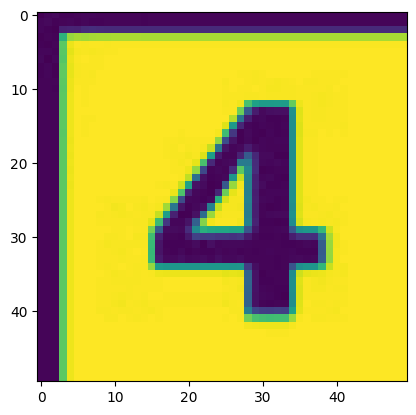

In [ ]:
def splitcells(img):
  rows = np.vsplit(img, 9)
  boxes = []
  for r in rows:
    cols = np.hsplit(r, 9)
    for box in cols:
      boxes.append(box)
  print(len(boxes))
  return boxes

sudoku_cell = splitcells(imagewrap)
plt.figure()
plt.imshow(sudoku_cell[0]) #will give columns
plt.show()

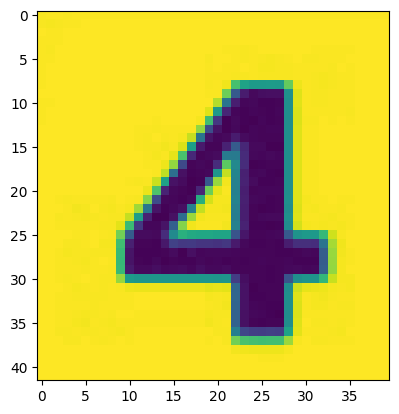

In [ ]:
from PIL import Image
def CropCell(cells):
    Cells_croped = []
    for image in cells:
        img = np.array(image)
        img = img[4:46, 6:46]
        img = Image.fromarray(img)
        Cells_croped.append(img)
    return Cells_croped
sudoku_cell_croped= CropCell(sudoku_cell)
#Let's have alook at the last cell
plt.figure()
plt.imshow(sudoku_cell_croped[0])
plt.show()

1/1 [==============================] - 0s 63ms/step
[4, 0, 0, 0, 0, 0, 2, 8, 0, 0, 0, 0, 0, 0, 9, 0, 0, 7, 0, 6, 3, 0, 0, 2, 0, 0, 1, 0, 0, 9, 0, 0, 5, 4, 3, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 4, 0, 7, 0, 0, 0, 0, 0, 1, 0, 6, 0, 7, 9, 0, 0, 6, 0, 7, 0, 2, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 8]


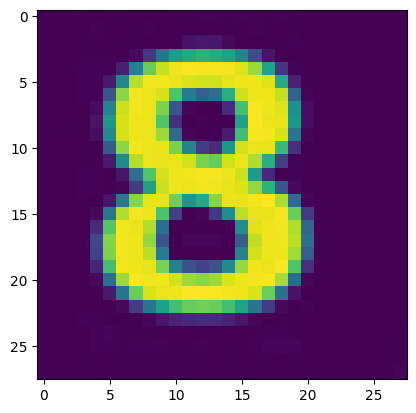

In [ ]:
from PIL import Image as im
ls=[]
for i in range(0,81):
    data = sudoku_cell_croped[i]
    img = np.array(data)
    img = data.resize((28, 28))
    #plt.imshow(img)
    img = im.eval(img, lambda x: 255 - x)
    plt.imshow(img)
    c = np.array(img)
    pred = model.predict(c.reshape(1, 28, 28, 1))
    #batch size, spatial dimensions, number of channels (1 for grayscale images).
    flag=0
    for k in pred[0]:
        if k==1: flag=1
    if flag!=1: ls.append(0)
    else: ls.append(pred.argmax())
print(ls)

In [ ]:
# Final predicted numbers array
ls=np.array(ls)
arr=np.reshape(ls,(3,3,9))
print(arr)

[[[4 0 0 0 0 0 2 8 0]
  [0 0 0 0 0 9 0 0 7]
  [0 6 3 0 0 2 0 0 1]]

 [[0 0 9 0 0 5 4 3 0]
  [0 2 0 3 0 0 0 0 0]
  [0 0 4 0 7 0 0 0 0]]

 [[0 1 0 6 0 7 9 0 0]
  [6 0 7 0 2 0 3 0 0]
  [0 4 0 0 0 0 0 0 8]]]


In [ ]:
import numpy as np

original_arr = np.array(
      [[[4, 0, 0, 0, 0, 0, 2, 8, 0],
        [0, 0, 0, 0, 0, 9, 0, 0, 7],
        [0, 6, 3, 0, 0, 2, 0, 0, 1]],

       [[0, 0, 9, 0, 0, 5, 4, 3, 0],
        [0, 2, 0, 3, 0, 0, 0, 0, 0],
        [0, 0, 4, 0, 7, 0, 0, 0, 0]],

       [[0, 1, 0, 6, 0, 7, 9, 0, 0],
        [6, 0, 7, 0, 2, 0, 3, 0, 0],
        [0, 4, 0, 0, 0, 0, 0, 0, 8]]])

unequal = np.argwhere(arr != original_arr)
print(unequal)

grid=list(np.reshape(arr,(9,9))); ans=[]

def possible(row, column, number):
    global grid
    for i in range(0,9):
        if grid[row][i] == number:
            return False

    for i in range(0,9):
        if grid[i][column] == number:
            return False

    x0 = (column // 3) * 3
    y0 = (row // 3) * 3
    for i in range(0,3):
        for j in range(0,3):
            if grid[y0+i][x0+j] == number:
                return False

    return True

def solve():
    global grid
    for row in range(0,9):
        for column in range(0,9):
            if grid[row][column] == 0:
                for number in range(1,10):
                    if possible(row, column, number):
                        grid[row][column] = number
                        solve()
                        grid[row][column] = 0

                return

    img = np.zeros((450, 450, 3), np.uint8)
    img.fill(255)
    font = cv2.FONT_HERSHEY_SIMPLEX
    fontScale = 1
    thickness = 2
    box_width = 450 // 9

    for i in range(0, 10):
        if i % 3 == 0:
            thickness = 3
        else:
            thickness = 1
        cv2.line(img, (0, i * box_width), (450, i * box_width), (0, 0, 0), thickness)
        cv2.line(img, (i * box_width, 0), (i * box_width, 450), (0, 0, 0), thickness)

    for i in range(0,9):
        for j in range(0,9):
            if grid[i][j] != 0:
                text = str(grid[i][j])
                color = (0, 0, 0)
                org = (j*box_width+box_width//3, i*box_width+2*box_width//3)
                img = cv2.putText(img, text, org, font, fontScale, color, thickness, cv2.LINE_AA)

    cv2.imwrite('sudoku.jpg', img)

solve()

In [ ]:
img = np.zeros((450, 450, 3), np.uint8)
img.fill(255)

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX
fontScale = 1
thickness = 2
box_width = 450 // 9

In [ ]:
for i in range(0, 10):
    if i % 3 == 0:
        thickness = 3
    else:
        thickness = 1
    cv2.line(img, (0, i * box_width), (450, i * box_width), (0, 0, 0), thickness)
    cv2.line(img, (i * box_width, 0), (i * box_width, 450), (0, 0, 0), thickness)

In [ ]:
for i in range(0,9):
    for j in range(0,9):
        if grid[i][j] != 0:
            text = str(grid[i][j])
            color = (0, 0, 0)
            org = (j*box_width+box_width//3, i*box_width+2*box_width//3)
            img = cv2.putText(img, text, org, font, fontScale, color, thickness, cv2.LINE_AA)
